# Le pendule double


Étude du mouvement d'un pendule double, modélisé par des équations newtioniennes.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Partie 1 : Résolution de l’équation différentielle avec le schéma Euler explicite

#### Question 1

In [2]:
def s1(y, l1, l2, m1, m2):
    g = 9.8 #valeur du champ gravitationnel
    return (-m2 * l1 * (y[3]**2) * sin(y[0] - y[1]) * cos(y[0] - y[1]) + g * m2 * sin(y[1]) * cos(y[0] - y[1]) - m2 * l2 * (y[3]**2) * sin(y[0] - y[1]) - (m1 + m2) * g * sin(y[0])) / (l1 * (m1 + m2) - m2 * l1 * (cos(y[0] - y[1])**2))

def s2(y, l1, l2, m1, m2):
    g = 9.8 #valeur du champ gravitationnel
    return (m2 * l2 * (y[3]**2) * sin(y[0] - y[1]) * cos(y[0] - y[1]) + g * (m1 + m2) * sin(y[0]) * cos(y[0] - y[1]) + (m1 + m2) * l1 * (y[3]**2) * sin(y[0] - y[1]) - g * (m1 + m2) * sin(y[1])) / (l2 * (m1 + m2) - m2 * l2 * (cos(y[0] - y[1])**2))

def f(y, l1, l2, m1, m2):
    if y.shape[0] != 4:
        print("Dimension du vecteur y incorrecte !")
    else :
        f = zeros(4)
        f[0] = y[2]
        f[1] = y[3]
        f[2] = s1(y, l1, l2, m1, m2)
        f[3] = s2(y, l1, l2, m1, m2)
        return f

#### Question 2

In [3]:
def stepEuler(yt, h, l1, l2, m1, m2):
    if yt.shape[0] != 4:
        print("Dimension du vecteur yt incorrecte !")
    else : return yt + h * f(yt, l1, l2, m1, m2)

#### Questions 3 & 4

In [4]:
def trajectoire_Euler(T, P, y0, l1, l2, m1, m2):
    h = T / P
    yt = y0
    trajectoire = [y0]
    p = 0
    while p < P:
        p += 1
        yt = stepEuler(yt, h, l1, l2, m1, m2)
        trajectoire.append(yt)
    return trajectoire

In [5]:
m1 = m2 = 1
l1 = l2 = 1
y0 = array([pi/2, pi/2, 0, 0])
T = 2
P = 1000
trajectoire_Euler_1 = trajectoire_Euler(T, P, y0, l1, l2, m1, m2)

#### Question 5

In [6]:
def plot_angles(trajectoire, T):
    theta1 = []
    theta2 = []
    for yt in trajectoire:
        theta1.append(yt[0])
        theta2.append(yt[1])
    fig = figure()
    x = linspace(0, T, num=len(trajectoire), endpoint=True)
    plot(x, theta1, label=r'$\theta_1$')
    plot(x, theta2, label=r'$\theta_2$')
    plt.title(r'Angle $\theta$ en fonction du temps')
    plt.ylabel(r'Angle $\theta$')
    plt.xlabel('Temps t (s)')
    legend()

def evol_vitesses_angulaires(trajectoire, T):
    theta1_derivee = []
    theta2_derivee = []
    for yt in trajectoire:
        theta1_derivee.append(yt[2])
        theta2_derivee.append(yt[3])
    fig = figure()
    x = linspace(0, T, num=len(trajectoire), endpoint=True)
    plot(x, theta1_derivee, label=r'$\dot \theta_1$')
    plot(x, theta2_derivee, label=r'$\dot \theta_2$')
    plt.title(r'Vitesse angulaire $\dot \theta$ en fonction du temps')
    plt.ylabel(r'Angle $\dot \theta$')
    plt.xlabel('Temps t (s)')
    legend()

def plot_trajectoire(trajectoire):
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for yt in trajectoire:
        x1.append(l1 * sin(yt[0]))
        y1.append(-l1 * cos(yt[0]))
        x2.append(l1 * sin(yt[0]) + l2 * sin(yt[1]))
        y2.append(-l1 * cos(yt[0]) - l2 * cos(yt[1]))
    fig = figure()
    plot(x1, y1, label=r'$m_1$')
    plot(x2, y2, label=r'$m_2$')
    plt.title('Trajectoire des masses')
    legend()

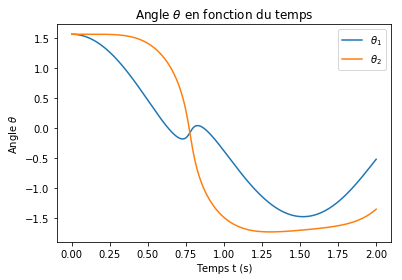

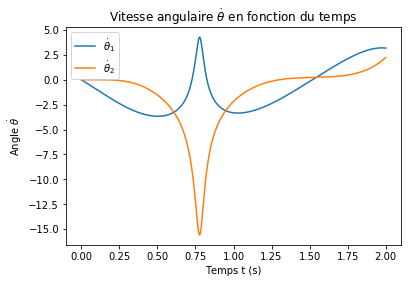

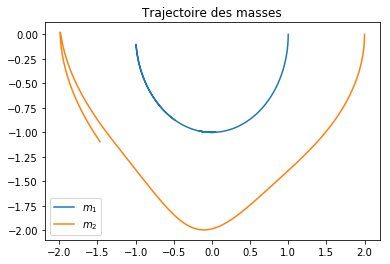

In [7]:
plot_angles(trajectoire_Euler_1, T)
plt.savefig('evol-angle-Euler.png')
evol_vitesses_angulaires(trajectoire_Euler_1, T)
plt.savefig('evol-vitesse-angulaire-Euler.png')
plot_trajectoire(trajectoire_Euler_1)
plt.savefig('trajectoire-Euler.png')

#### Question 6

In [8]:
def energie(y):
    if y.shape[0] != 4:
        print("Dimension du vecteur y incorrecte !")
    else :
        g = 9.8
        Ec = 1/2 * (m1 + m2) * (y[2]**2) * l1 + 1/2 * m2 * (y[3]**2) * l2 + m2 * y[2] * y[3] * l1 * l2 * cos(y[0] - y[1])
        Ep = -(m1 + m2) * g * l1 * cos(y[0]) - m2 * l2 * g * cos(y[1])
        return Ec + Ep

def evol_energy(trajectoire, T):
    E = []
    for yt in trajectoire:
        E.append(energie(yt))
    fig = figure()
    x = linspace(0, T, num = len(E), endpoint=True)
    plot(x, E)
    plt.title('Evolution de l\'énergie E au cours du temps')
    plt.ylabel('Energie E')
    plt.xlabel('Temps t (s)')
    legend()

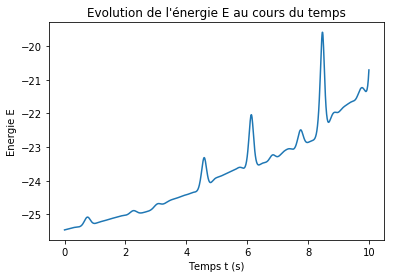

In [9]:
m1 = m2 = 1
l1 = l2 = 1
y0 = array([pi/6, pi/6, 0, 0])
T = 10
P = 1000

trajectoire_Euler_2 = trajectoire_Euler(T, P, y0, l1, l2, m1, m2)
evol_energy(trajectoire_Euler_2, T)
plt.savefig('evol-energie-Euler.png')

## Partie 2 : Résolution de l’équation différentielle avec le schéma de Verlet

#### Question 1

In [10]:
def stepVerlet(yt, h, l1, l2, m1, m2):
    y1 = yt[0] + h * yt[2] + h**2/2 * s1(yt, l1, l2, m1, m2)
    y2 = yt[1] + h * yt[3] + h**2/2 * s2(yt, l1, l2, m1, m2)
    w = array([y1, y2, yt[2], yt[3]])
    y3 = yt[2] + h/2 * (s1(w, l1, l2, m1, m2) + s1(yt, l1, l2, m1, m2))
    y4 = yt[3] + h/2 * (s2(w, l1, l2, m1, m2) + s2(yt, l1, l2, m1, m2))
    return array([y1,y2,y3,y4])

#### Question 2

In [11]:
def trajectoire_Verlet(T, P, y0, l1, l2, m1, m2):
    h = T / P
    yt = y0
    trajectoire = [y0]
    p = 0
    while p < P:
        p += 1
        yt = stepVerlet(yt, h, l1, l2, m1, m2)
        trajectoire.append(yt)
    return trajectoire

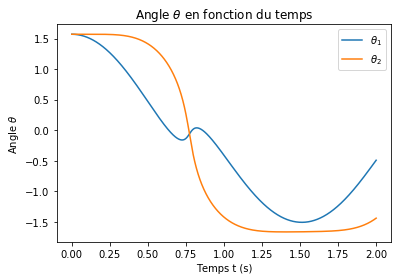

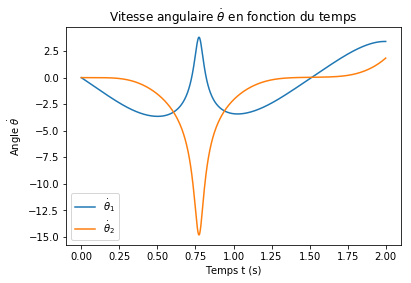

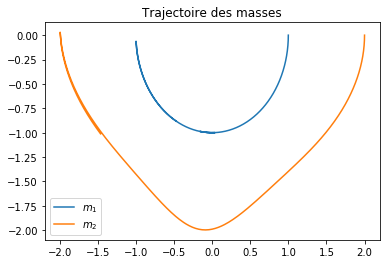

In [12]:
m1 = m2 = 1
l1 = l2 = 1
y0 = array([pi/2, pi/2, 0, 0])
T = 2
P = 1000

trajectoire_Verlet_1 = trajectoire_Verlet(T, P, y0, l1, l2, m1, m2)    

plot_angles(trajectoire_Verlet_1, T)
plt.savefig('evol-angle-Verlet.png')
evol_vitesses_angulaires(trajectoire_Verlet_1, T)
plt.savefig('evol-vitesse-angulaire-Verlet.png')
plot_trajectoire(trajectoire_Verlet_1)
plt.savefig('trajectoire-Verlet.png')

#### Question 3

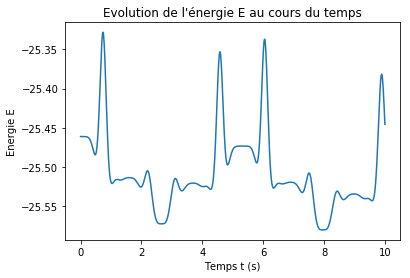

In [13]:
m1 = m2 = 1
l1 = l2 = 1
y0 = array([pi/6, pi/6, 0, 0])
T = 10
P = 1000

trajectoire_Verlet_2 = trajectoire_Verlet(T, P, y0, l1, l2, m1, m2)
evol_energy(trajectoire_Verlet_2, T)
plt.savefig('evol-energie-Verlet.png')

## Partie 3 : Mouvement chaotique et sensibilité par rapport aux conditions initiales

#### Question 1

In [14]:
def plot_espace_phases(trajectoire) : 
    theta1 = []
    theta2 = []
    theta1_derivee = []
    theta2_derivee = []
    for yt in trajectoire :
        theta1.append(yt[0])
        theta2.append(yt[1])
        theta1_derivee.append(yt[2])
        theta2_derivee.append(yt[3])
    fig = figure()
    plot(theta1, theta1_derivee, label=r'$\theta_1$')
    plot(theta2, theta2_derivee, label=r'$\theta_2$')
    plt.ylabel(r'Angle $\dot \theta$')
    plt.xlabel(r'Angle $\theta$')
    plt.title(r"Vitesse angulaire $\dot \theta$ en fonction de l'angle $\theta$")
    legend()

#### Question 2 (a)

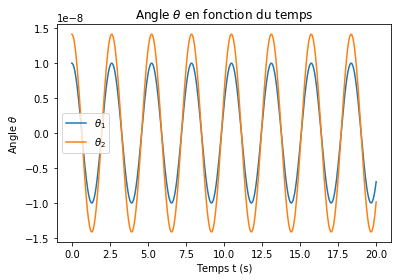

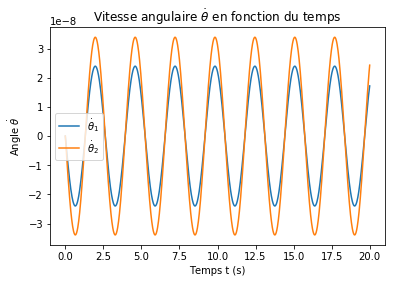

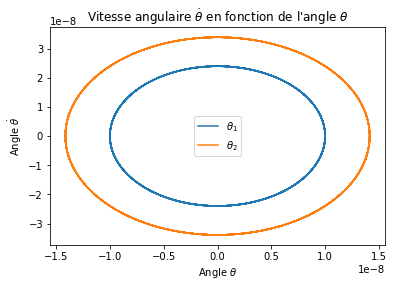

In [15]:
m1 = m2 = 1
l1 = l2 = 1
y0 = array([1e-8, sqrt(2) * 1e-8, 0, 0])
T = 20
P = 1000

trajectoire = trajectoire_Verlet(T, P, y0, l1, l2, m1, m2)
plot_angles(trajectoire, T)
plt.savefig('evol-angle-petites-oscillations-a.png')
evol_vitesses_angulaires(trajectoire, T)
plt.savefig('evol-vitesse-angulaire-petites-oscillations-a.png')
plot_espace_phases(trajectoire)
plt.savefig('espace-phases-petites-oscillations-a.png')

#### Question 2 (b)

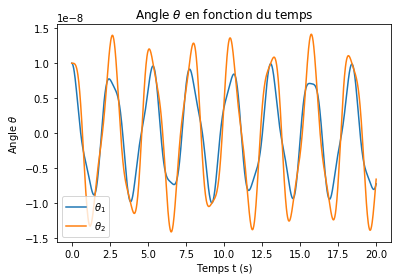

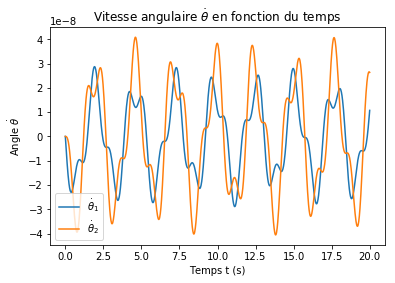

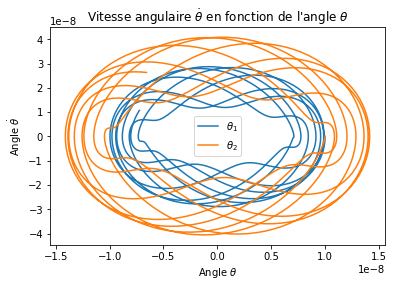

In [16]:
m1 = m2 = 1
l1 = l2 = 1
y0 = array([1e-8, 1e-8, 0, 0])
T = 20
P = 1000

trajectoire = trajectoire_Verlet(T, P, y0, l1, l2, m1, m2)

plot_angles(trajectoire, T)
plt.savefig('evol-angle-petites-oscillations-b.png')
evol_vitesses_angulaires(trajectoire, T)
plt.savefig('evol-vitesse-angulaire-petites-oscillations-b.png')
plot_espace_phases(trajectoire)
plt.savefig('espace-phases-petites-oscillations-b.png')

#### Question 3

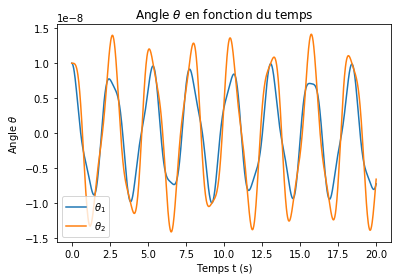

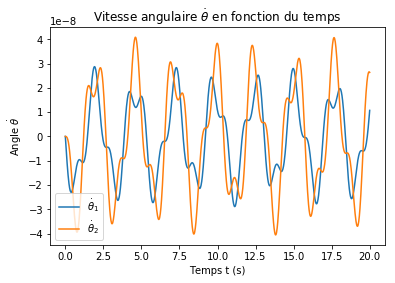

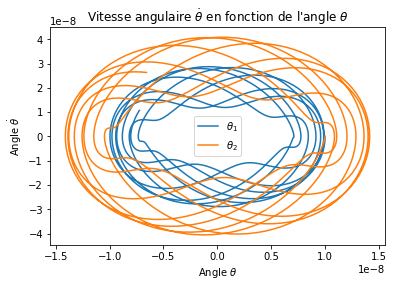

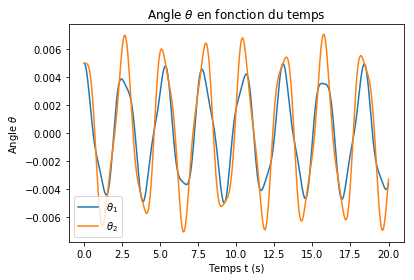

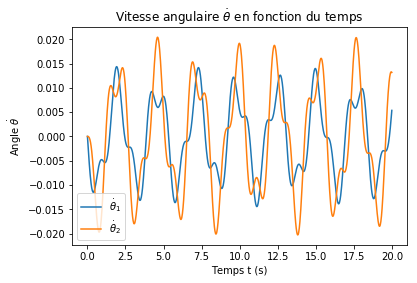

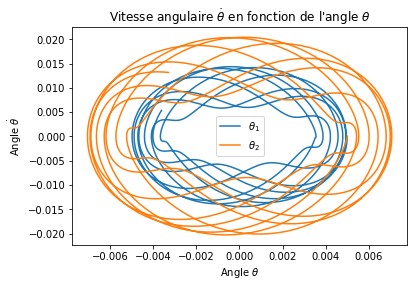

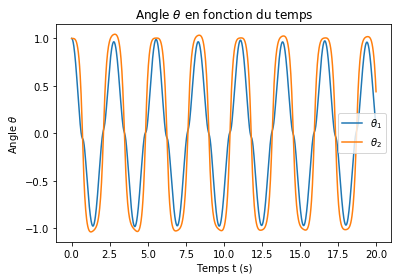

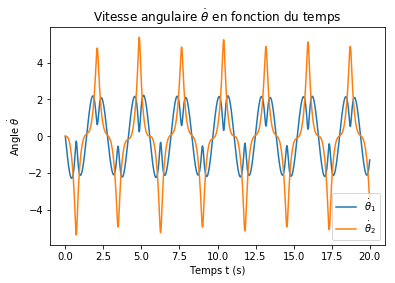

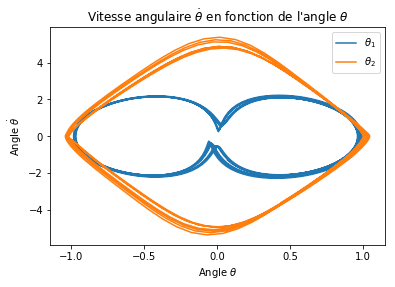

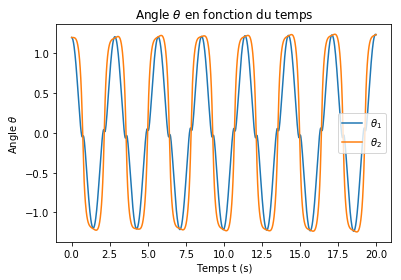

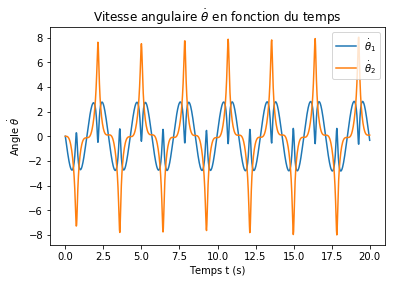

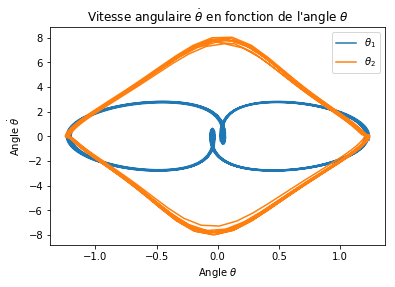

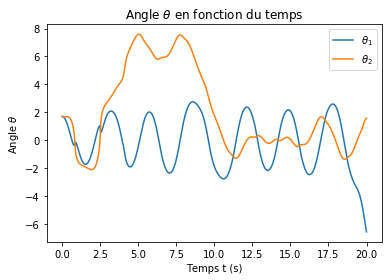

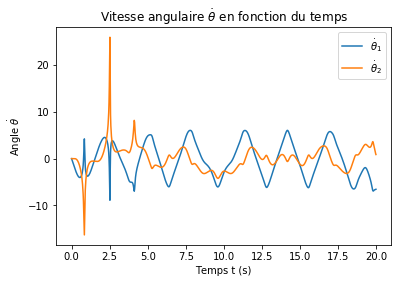

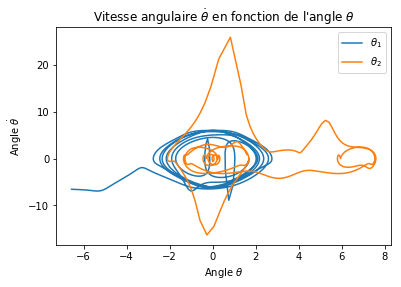

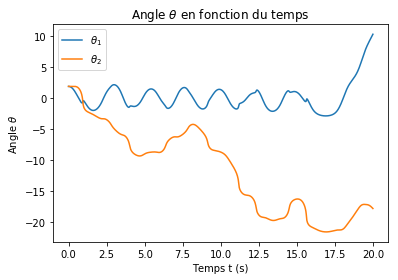

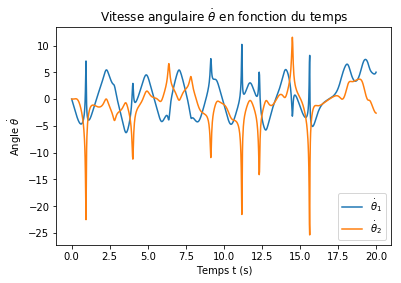

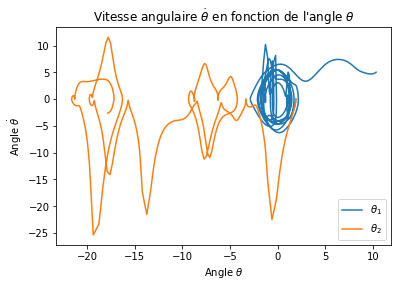

In [17]:
m1 = m2 = 1
l1 = l2 = 1
T = 20
P = 1000

Alpha = [1e-8, 5 * 1e-3, 1, 1.2, 1.7, 1.9]
i = 0
for alpha in Alpha:
    i += 1
    y0 = array([alpha, alpha, 0, 0])
    trajectoire = trajectoire_Verlet(T, P, y0, l1, l2, m1, m2)
    plot_angles(trajectoire, T)
    titre1 = "evol-angle-chaos" + str(i) + ".png"
    plt.savefig(titre1)
    evol_vitesses_angulaires(trajectoire, T)
    titre2 = "evol-vitesse-angulaire-chaos" + str(i) + ".png"
    plt.savefig(titre2)
    plot_espace_phases(trajectoire)
    titre3 = "espace-phases-chaos" + str(i) + ".png"
    plt.savefig(titre3)